In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn import metrics

In [2]:
raw_ds = fetch_california_housing()
raw_ds

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [3]:
ds = pd.DataFrame(raw_ds.data , columns = raw_ds.feature_names)
ds

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [4]:
ds['Price'] = raw_ds.target

In [5]:
ds.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [6]:
ds.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
Price,0


In [7]:
corelation = ds.corr()

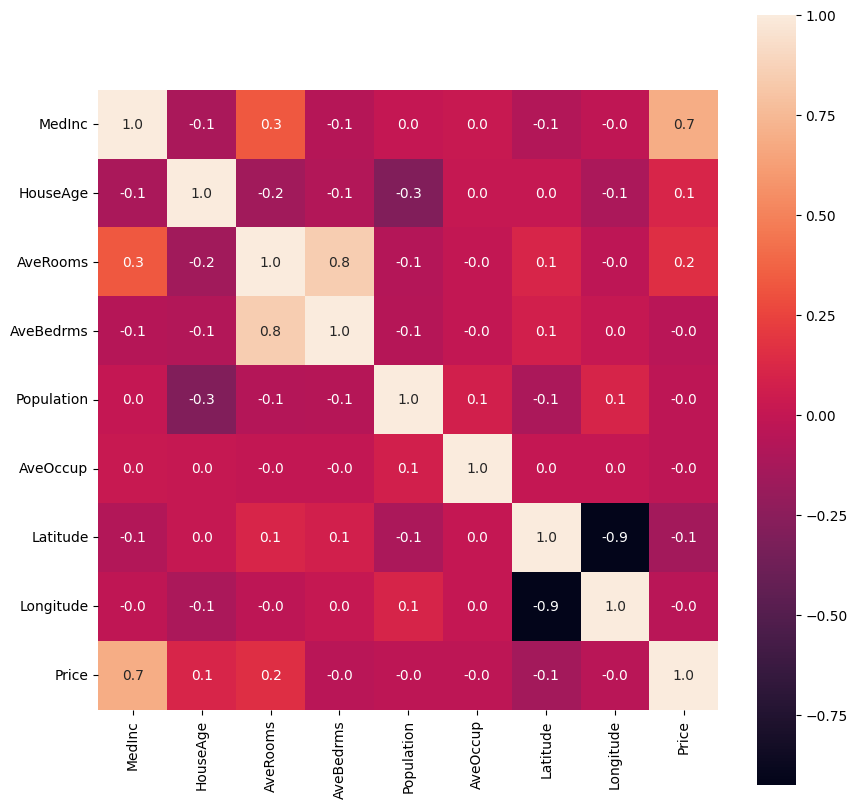

In [8]:
plt.figure(figsize = (10,10))
sns.heatmap(corelation , annot = True, square = True , cbar = 'True', fmt = '.1f')
plt.show()

In [9]:
x = ds.drop(['Price'],axis = 1)
y = ds['Price']
x

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [10]:
y

,Price
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 2)

In [12]:
x_train.shape

(16512, 8)

In [13]:
x_test.shape

(4128, 8)

In [14]:
model = XGBRegressor()

In [15]:
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [16]:
predicted_data = model.predict(x_train)
predicted_data

array([0.5523039, 3.0850039, 0.5835302, ..., 1.9204227, 1.952873 ,
       0.6768683], dtype=float32)

In [17]:
score_1 = metrics.r2_score(y_train,predicted_data)
score_2 = metrics.mean_absolute_error(y_train,predicted_data)
score_3 = metrics.mean_squared_error(y_train,predicted_data)
print("R2 Score : ",score_1)
print("Mean Absolute Error : ",score_2)
print("Mean Squared Error : ",score_3)

R2 Score :  0.943650140819218
Mean Absolute Error :  0.1933648700612105
Mean Squared Error :  0.0748112971690747


In [18]:
predicted_data_test = model.predict(x_test)

In [19]:
score_11 = metrics.r2_score(y_test,predicted_data_test)
score_21 = metrics.mean_absolute_error(y_test,predicted_data_test)
score_31 = metrics.mean_squared_error(y_test,predicted_data_test)
print("R2 Score : ",score_11)
print("Mean Absolute Error : ",score_21)
print("Mean Squared Error : ",score_31)

R2 Score :  0.8338000331788725
Mean Absolute Error :  0.3108631800268186
Mean Squared Error :  0.22387540906811954


In [23]:
MedInc = float(int(input('enter the medium income value')))
HouseAge= float(int(input('enter the houseage value ')))
AveRooms= float(int(input('enter number of available rooms')))
AveBedrms= float(int(input('enter the number of available bed rooms ')))
Population= float(int(input('enter the popolation ')))
AveOccup= float(int(input('enter the average occupation value ')))
Latitude= float(int(input('enter the latitude')))
Longitude= float(int(input('enter the longitude')))

l1 = [MedInc	,HouseAge,	AveRooms,	AveBedrms	,Population	,AveOccup,	Latitude,	Longitude]
q = np.asarray(l1).reshape(1,-1)
result = model.predict(q)
result = result * 1000
print(result)

enter the medium income value20
enter the houseage value 5
enter number of available rooms3
enter the number of available bed rooms 2
enter the popolation 5
enter the average occupation value 10
enter the latitude22
enter the longitude33
[3341.2017]
